# <center>   
   # <center> A machine learning Predictive Model

# Table of Contents

1. **[Project Background](#1)**
2. **[Exploratory Data Analysis and vizsualization](#2)**
3. **[Research Methods](#3)**
4. **[Data Cleansing](#4)**
5. **[Feature Engineering](#5)**
6. **[Model Selection](#6)**
7. **[Performance Optimization](#7)**
7. **[Experiment](#8)**
7. **[Conclusion & Recommendations](#8)**

# Part 1. Project Background

![](https://miro.medium.com/max/2726/1*ra5Opk-6Fy1wH0IPXiankA.png)

The goal of this project is to build a predictive model for the housing prices of California. The dataset if from the 1990 Census. The final data contained 20,640 observations on 9 variables. The dependent variable is ln(median house value). House value is extremely valuable to investors and predicting this information can maximize profits. Is it all location, location, location? Or are there other variables to consider? We will find out!

# Part 2. Exploratory Data Analysis and Visualization

## Load the raw data


Like I said before its from the 1990 Census. It is publicly available here https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

Its difficult to get, I had to unzip twice and use a program that I'm not at liberty to discuss to get this data. I have uploaded the csv to my github

In [1]:
#import packages
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import numpy.random as nr
import math
import pandas as pd
import seaborn as sns
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import scipy.stats as ss
import matplotlib.pyplot as plt
import statsmodels.api as sm  #Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#lin = LinearRegression()
# Use inline magic command so plots appear in the data frame
%matplotlib inline

#import data
df = pd.read_csv('C:\\Users\Owner\Documents\DataScience\proj5Cal_Housing.csv')

print(df.columns)
print(df.head)
df.describe()

# OH shit, we need column headers, or else none of this makes sense. 
df.columns = ['Longitude', 'Latitude','HousingMedianAge','TotalRooms','TotalBedrooms','Population','Households','MedianIncome','MedianHouseValue']
print(df.head)

Index(['-122.23', '37.88', '41', '880', '129', '322', '126', '8.3252',
       '452600'],
      dtype='object')
<bound method NDFrame.head of        -122.23  37.88  41   880     129   322   126  8.3252  452600
0      -122.22  37.86  21  7099  1106.0  2401  1138  8.3014  358500
1      -122.24  37.85  52  1467   190.0   496   177  7.2574  352100
2      -122.25  37.85  52  1274   235.0   558   219  5.6431  341300
3      -122.25  37.85  52  1627   280.0   565   259  3.8462  342200
4      -122.25  37.85  52   919   213.0   413   193  4.0368  269700
...        ...    ...  ..   ...     ...   ...   ...     ...     ...
20634  -121.09  39.48  25  1665   374.0   845   330  1.5603   78100
20635  -121.21  39.49  18   697   150.0   356   114  2.5568   77100
20636  -121.22  39.43  17  2254   485.0  1007   433  1.7000   92300
20637  -121.32  39.43  18  1860   409.0   741   349  1.8672   84700
20638  -121.24  39.37  16  2785   616.0  1387   530  2.3886   89400

[20639 rows x 9 columns]>
<bound method ND

Getting more info

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20639 entries, 0 to 20638
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Longitude         20639 non-null  float64
 1   Latitude          20639 non-null  float64
 2   HousingMedianAge  20639 non-null  int64  
 3   TotalRooms        20639 non-null  int64  
 4   TotalBedrooms     20432 non-null  float64
 5   Population        20639 non-null  int64  
 6   Households        20639 non-null  int64  
 7   MedianIncome      20639 non-null  float64
 8   MedianHouseValue  20639 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.4 MB


Good, no nulls to delete

In [3]:
#Seeing more descriptive data
df.describe()


,Longitude,Latitude,HousingMedianAge,TotalRooms,TotalBedrooms,Population,Households,MedianIncome,MedianHouseValue
count,20639.000000,20639.000000,20639.000000,20639.000000,20432.000000,20639.000000,20639.000000,20639.000000,20639.000000
mean,-119.569576,35.631753,28.638888,2635.848152,537.890564,1425.530210,499.557779,3.870455,206843.910122
std,2.003495,2.135947,12.585568,2181.633870,421.385673,1132.463507,382.330173,1.899615,115385.731702
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1448.000000,296.000000,787.000000,280.000000,2.563100,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534700,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.742850,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Lets viz the columns

array([[<AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'HousingMedianAge'}>],
       [<AxesSubplot:title={'center':'TotalRooms'}>,
        <AxesSubplot:title={'center':'TotalBedrooms'}>,
        <AxesSubplot:title={'center':'Population'}>],
       [<AxesSubplot:title={'center':'Households'}>,
        <AxesSubplot:title={'center':'MedianIncome'}>,
        <AxesSubplot:title={'center':'MedianHouseValue'}>]], dtype=object)

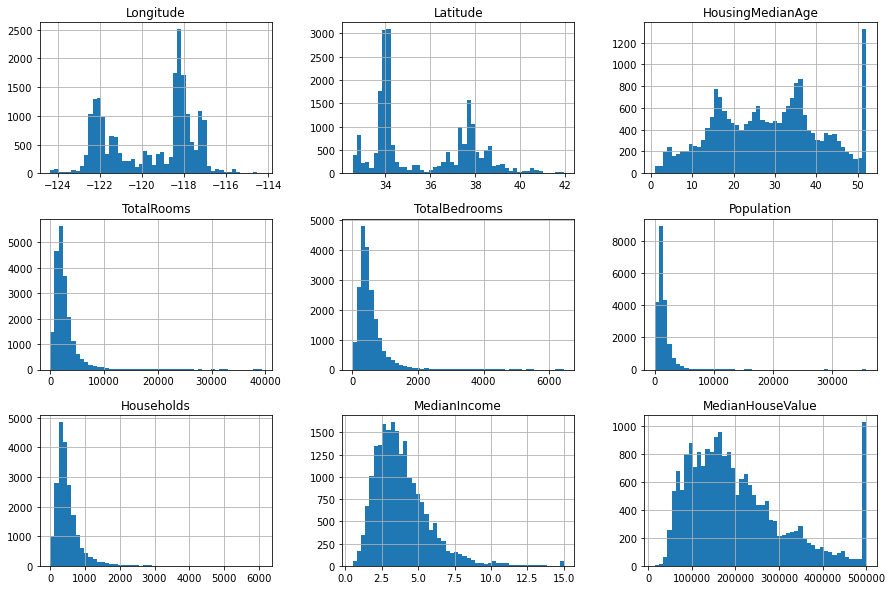

In [4]:
df.hist(bins=50,figsize=(15,10))
#this is just to see trends. Some of the axis are skewed heavily, (amount of bedrooms) so let's use common sense here

In [5]:
num_features=['Longitude', 'Latitude','HousingMedianAge','TotalRooms','TotalBedrooms','Population','Households','MedianIncome','MedianHouseValue']

In [6]:
#Checking for skewness
skewness=[]
for i in num_features:
    skewness.append(df[i].skew())
pd.DataFrame(data=skewness,index=num_features,columns=['skewness']).sort_values(by='skewness',ascending=False)

,skewness
Population,4.935982
TotalRooms,4.147347
TotalBedrooms,3.459603
Households,3.410495
MedianIncome,1.646991
MedianHouseValue,0.977903
Latitude,0.466076
HousingMedianAge,0.060430
Longitude,-0.297912


Possibly view on the map

Text(0.5, 1.0, 'Distribution of households')

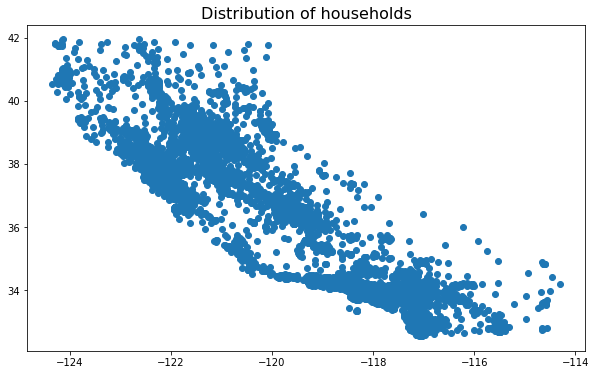

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['Longitude'],y=df['Latitude'])
plt.title("Distribution of households",size=16)

Hmmm...Kinda looks like...California. Let's superimpose a map!

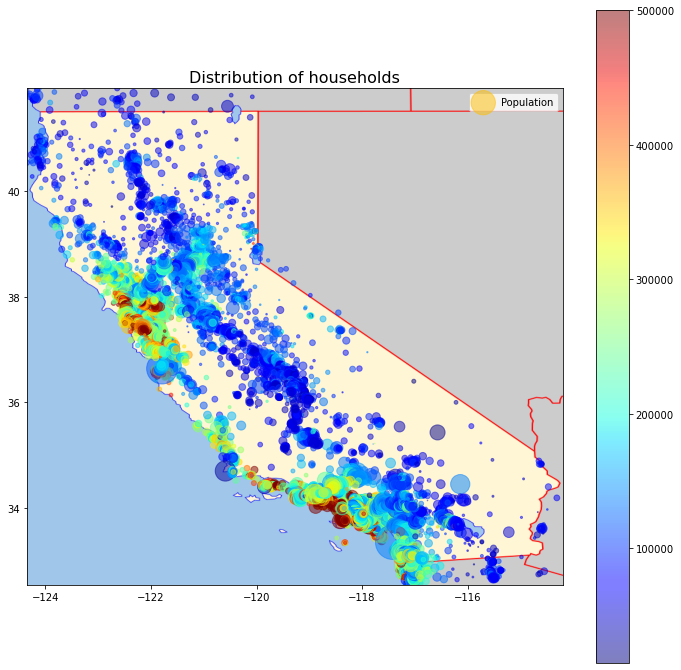

In [8]:
plt.figure(figsize=(12,12))
img=plt.imread('C:\\Users\Owner\Documents\DataScience\Old Projects\california.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])

plt.scatter(x=df['Longitude'],y=df['Latitude'],alpha=0.5,s=df['Population']/30,c=df['MedianHouseValue'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')
plt.colorbar()
plt.title("Distribution of households",size=16)
plt.legend()

Overlap with image isn't precise, but its a good representation. Some takeaways is that location matters and population density matters. Let's see what else matters. 

In [9]:
corr_matrix=df.corr()

In [10]:
corr_matrix['MedianHouseValue'].sort_values(ascending=False)

MedianHouseValue    1.000000
MedianIncome        0.688000
TotalRooms          0.134253
HousingMedianAge    0.105536
Households          0.065952
TotalBedrooms       0.049794
Population         -0.024552
Longitude          -0.045837
Latitude           -0.144289
Name: MedianHouseValue, dtype: float64

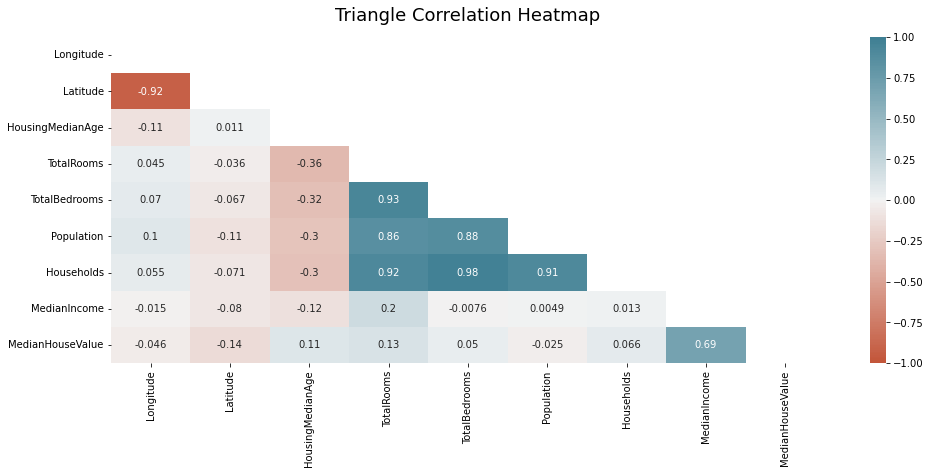

In [11]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr()))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(20, 220, n=200))
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Looks like total Bedrooms, poopulation, and households are correlated with each other. 

Looking at outliers, and possibly removing them

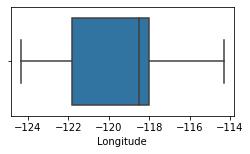

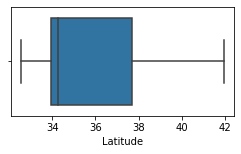

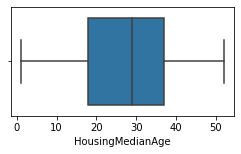

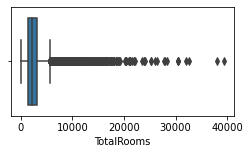

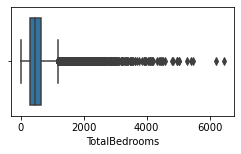

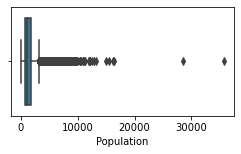

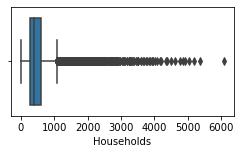

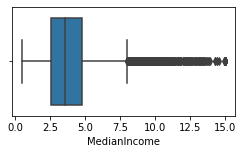

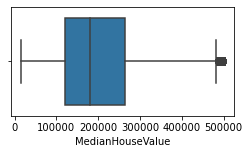

In [12]:
num_features=['Longitude', 'Latitude','HousingMedianAge','TotalRooms','TotalBedrooms','Population','Households','MedianIncome','MedianHouseValue']

for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(4,2)
    #plt.xlim(-10,10)
    sns.boxplot(x=i, data=df,ax=ax)

We're going to remove some of these outliers in Part 4 (data cleansing). 

# Part 3. Research Methods <a id="3"></a>


We are tasked to calculate the sample correlation between at least one pair of variables. Come up with a hypothesis and calculate the p-value. I have decided to investigate the correlation between total rooms and price

                            OLS Regression Results                            
Dep. Variable:       MedianHouseValue   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.053e+33
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:35:56   Log-Likelihood:             4.3034e+05
No. Observations:               20639   AIC:                        -8.607e+05
Df Residuals:                   20637   BIC:                        -8.607e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
MedianHouseValue     1.0000   1.29e-17  

Text(0.5, 1.0, 'Relationship between Rooms and MdianHouseValue')

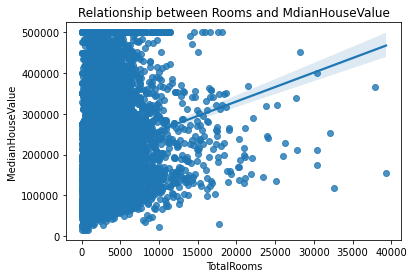

In [13]:
## Add a constant term to the array of predictors to get an intercept term
predictors = sm.add_constant(df.MedianHouseValue, prepend = False)

lm_mod = sm.OLS(df.MedianHouseValue, predictors)
res = lm_mod.fit()
print(res.summary())

#print scatter plot of RM and MEDV
sns.regplot(y="MedianHouseValue", x="TotalRooms", data=df, fit_reg = True)
plt.title("Relationship between Rooms and MdianHouseValue")

So there's way too much data and features to make trends. We'll need to process this data better

In [14]:
from scipy import stats
def t_one_sample(samp, mu = 0.0, alpha = 0.1):
    '''Function for two-sided one-sample t test'''
    t_stat = stats.ttest_1samp(samp, mu)
    scale = np.std(samp)
    loc = 28.44
    ci = stats.t.cdf(alpha/2, len(samp), loc=mu, scale=scale)
    print('Results of one-sample two-sided t test')
    print('Mean         = %4.3f' % loc)
    print('t-Statistic  = %4.3f' % t_stat[0])
    print('p-value      < %4.3e' % t_stat[1])
    print('On degrees of freedom = %4d' % (len(samp) - 1))
    print('Confidence Intervals for alpha =' + str(alpha))
    print('Lower =  %4.3f Upper = %4.3f' % (loc - ci, loc + ci))
    
t_one_sample(df.MedianHouseValue)  

Results of one-sample two-sided t test
Mean         = 28.440
t-Statistic  = 257.534
p-value      < 0.000e+00
On degrees of freedom = 20638
Confidence Intervals for alpha =0.1
Lower =  27.940 Upper = 28.940


# Part 4. Cleansing And Preprocessing <a id="4"></a>


With a sound knowledge of the distribution of key variables, further analysis of each customer characteristic can be carried out to investigate its influence on the subscription rate.

![qwe](https://media3.giphy.com/media/l378c04F2fjeZ7vH2/giphy.gif)

### 4.1 Removing outliers

In [15]:
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin

class RemoveOutliers(BaseEstimator,TransformerMixin):
    """This class removes outliers from data.
    Note: Outlier values are hard coded
    """
    def fit (self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        X=X[(X['MedianHouseValue']!=500001) | (X['MedianIncome']>=2)].reset_index(drop=True)
        X=X[X['MedianIncome']<=11].reset_index(drop=True)
        X=X[(X['MedianHouseValue']!=350000) | (X['MedianIncome']>=1.5)].reset_index(drop=True)
        X=X[(X['MedianHouseValue']!=450000) | (X['MedianIncome']>=2)].reset_index(drop=True)
        X=X[(X['MedianHouseValue']>=350000) | (X['MedianIncome']<=9.5)].reset_index(drop=True)
        X=X[X['Population']<=9000]
        #X=X[(X['population_per_household']>=1.15) & (X['population_per_household']<=6.5)]
        #X=X[X['rooms_per_household']<20]
        #X=X[X['bedrooms_per_room']<0.5].reset_index(drop=True)
        return X
    
    #https://github.com/sonarsushant/California-House-Price-Prediction/blob/master/EDA%20and%20Data%20Cleaning.ipynb

### 4.1 Removing outliers


In [16]:
df1=RemoveOutliers().fit_transform(df)

### 4.2  Removing nulls

In [17]:
#Get number of Null Values
def get_null_count(data):
    for i in data.columns:
        print(i,': ',len(data[df[i].isnull()][i]))

In [18]:
get_null_count(df)

Longitude :  0
Latitude :  0
HousingMedianAge :  0
TotalRooms :  0
TotalBedrooms :  207
Population :  0
Households :  0
MedianIncome :  0
MedianHouseValue :  0


In [19]:
data_null=df[df['TotalBedrooms'].isnull()]

Plotting nulls to see if there are any patterns. For example, if they are in a certain region or not with more nulls

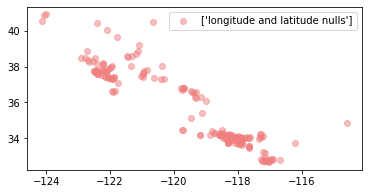

In [20]:

plt.figure(figsize=(6,3))
plt.scatter(x=data_null['Longitude'],y=data_null['Latitude'],alpha=0.5, color="lightcoral", label=['longitude and latitude nulls']) 
plt.legend()

 Replacing the nulls with a median value

In [21]:
#replacing the nulls with median value
df['TotalBedrooms'] = df['TotalBedrooms'].fillna(df['TotalBedrooms'].median())

### 4.4 Multicolinearity (possibly)

 We could check [this github](https://github.com/sonarsushant/California-House-Price-Prediction/blob/master/EDA%20and%20Data%20Cleaning.ipynb) for Multicolinearity for further model development

### 4.5 Transform skewed data (possibly)

 We could check [this github](https://github.com/sonarsushant/California-House-Price-Prediction/blob/master/EDA%20and%20Data%20Cleaning.ipynb) to transform skewed data for further model development

In [22]:
Features = np.array(df[['Longitude', 'Latitude','HousingMedianAge','TotalRooms','TotalBedrooms',
                        'Population','Households','MedianIncome']])

#above are the defined features (all 8 while MedianHouseValue is the label)

### 5.3 Split the dataset

In [23]:
##5.3 split the dataset

import sklearn.model_selection as ms
nr.seed(9988)
labels = np.array(df['MedianHouseValue'])
# something was here
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 3000) #total rows is roughly 20,000
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])
# x_train #to troubleshoot below code
print("x_train shape", x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (17639, 8)
x_test shape (3000, 8)
y_train shape (17639,)
y_test shape (3000,)


Good, shapes are correct.

### 5.4 Scale the data

In [24]:
scaler = preprocessing.StandardScaler().fit(x_train) #The 
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#x_train[:2,:] #not sure what this was for. Delete when finished
print(" scaled_x_train shape", x_train.shape)
print("scaled_x_test shape",x_test.shape)

 scaled_x_train shape (17639, 8)
scaled_x_test shape (3000, 8)


# Part 6. ML Model Selection <a id="6"></a>


We will try to solve our problem with 3 different regression models:
- Linear regression
- Random forest
- Gradient boosting

Linear regression is fast, simple and can provide quite a good baseline result for our task.
Tree based models can provide better results in case of nonlinear complex dependences of variables and in case of small number of variables, they are also more stable to multicollinearity (and we have highly correlated variables). Moreover in our problem target values are clipped and targets can't be outside the clipping interval, it is good for the tree-based models.

The results of using these models will be compared in the next parts of the project. Tree-based models are expected to work better in this particular problem, but we will start with more simple model.

We will start with standard linear regression, go through all of the modeling steps, and then do some simplified computations for 2 other models (without in-depth explanation of every step).

The final model selection will be done based on the results.

Dataset changes so far...
<br>1)	Default
<br>2)	Removed Nulls and filled them with median value
<br>3)	Removed outliers
<br>4)	Scaled Data


<br> Will do feature engineering soon

### Linear Regression

In [25]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge

kf = KFold(n_splits=10, random_state=17, shuffle=True)

In [26]:
model=Ridge(alpha=1)
X=x_train
y=y_train
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
print(np.sqrt(-cv_scores.mean()))

69882.59732585312


We are doing cross validation with 10 folds, computing 'neg_mean_squared_error' (neg - because sklearn needs scoring functions to be minimized). Our final metrics: RMSE=np.sqrt(-neg_MSE)

So our baseline is RMSE = $69,882 we will try to improve this results using everything we have discovered during the data analysis phase.

We will do the following steps:
* Use scaled features
* Add log features 
* Add NaN and age clip indicating features
* Add city-distance features
* Generate several new features
* Try to predict log(target) instead of target
* Tune some hyperparameters of the model

And now we will tune the only meaningful hyperparameter of the Ridge regression - alpha.

## 7. Plotting training and validation curves

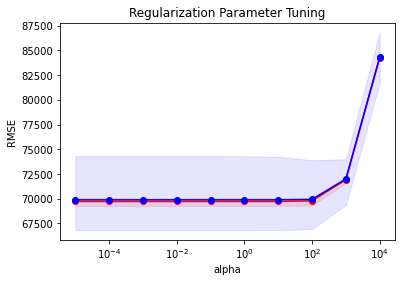

In [27]:
from sklearn.model_selection import validation_curve

Cs=np.logspace(-5, 4, 10)
train_scores, valid_scores = validation_curve(model, X, y, "alpha", 
                                              Cs, cv=kf, scoring='neg_mean_squared_error')

plt.plot(Cs, np.sqrt(-train_scores.mean(axis=1)), 'ro-')

plt.fill_between(x=Cs, y1=np.sqrt(-train_scores.max(axis=1)), 
                 y2=np.sqrt(-train_scores.min(axis=1)), alpha=0.1, color = "red")


plt.plot(Cs, np.sqrt(-valid_scores.mean(axis=1)), 'bo-')

plt.fill_between(x=Cs, y1=np.sqrt(-valid_scores.max(axis=1)), 
                 y2=np.sqrt(-valid_scores.min(axis=1)), alpha=0.1, color = "blue")

plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('Regularization Parameter Tuning')

plt.show()

In [28]:
Cs[np.sqrt(-valid_scores.mean(axis=1)).argmin()]

10.0

We can see that curves for train and CV are very close to each other, it is a sign of underfiting. The difference between the curves does not change along with change in alpha this mean that we should try more complex models comparing to linear regression or add more new features (f.e. polynomial ones)

Using this curve we can find the optimal value of alpha. It is alpha=1. But actually our prediction does not change when alpha goes below 1.

Let's use alpha=1 and plot the learning curve

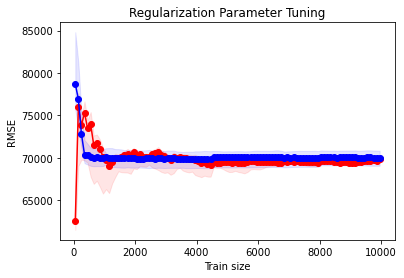

In [29]:
from sklearn.model_selection import learning_curve

model=Ridge(alpha=1.0)

train_sizes, train_scores, valid_scores = learning_curve(model, X, y, train_sizes=list(range(50,10001,100)),
                                                         scoring='neg_mean_squared_error', cv=5)

plt.plot(train_sizes, np.sqrt(-train_scores.mean(axis=1)), 'ro-')

plt.fill_between(x=train_sizes, y1=np.sqrt(-train_scores.max(axis=1)), 
                 y2=np.sqrt(-train_scores.min(axis=1)), alpha=0.1, color = "red")

plt.plot(train_sizes, np.sqrt(-valid_scores.mean(axis=1)), 'bo-')

plt.fill_between(x=train_sizes, y1=np.sqrt(-valid_scores.max(axis=1)), 
                 y2=np.sqrt(-valid_scores.min(axis=1)), alpha=0.1, color = "blue")

plt.xlabel('Train size')
plt.ylabel('RMSE')
plt.title('Regularization Parameter Tuning')

plt.show()

Learning curves indicate high bias of the model - this means we will not improve our model by adding more data, but we can try to use more complex models or add more features to improve the results.

This result is inline with the validation curve results. So let's move on to the more complex models.

### Random forest

Actually we can just put all our features into the model but we can easily improve computational performance of the tree-based models, by deleting all monotonous derivatives of features because they does not help at all.

For example, adding log(feature) don't help tree-based model, it will just make it more computationally intensive.

So let's train random forest classifier based on shorten set of the features

In [30]:
# X.columns  #currently X isn't defined, but this is for when we add features


In [31]:
# features_for_trees = ['feature', 'feature2']
features_for_trees = x_train

In [32]:
%%time
from sklearn.ensemble import RandomForestRegressor

X_trees=features_for_trees

model_rf=RandomForestRegressor(n_estimators=100, random_state=17)
cv_scores = cross_val_score(model_rf, X_trees, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

print(np.sqrt(-cv_scores.mean()))

49517.73398043293
Wall time: 28.7 s


We can see significant improvement, comparing to the linear model and higher n_estimator probably will help. But first, let's try to tune other hyperparametres:

Hyperparameters can be classified as model hyperparameters, that cannot be inferred while fitting the machine to the training set because they refer to the model selection task, or algorithm hyperparameters, that in principle have no influence on the performance of the model but affect the speed and quality of the learning process. An example of a model hyperparameter is the topology and size of a neural network

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators': [100],
            'max_depth':  [22, 23, 24, 25],
            'max_features': [5,6,7,8]}

gs=GridSearchCV(model_rf, param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=kf, verbose=1)

gs.fit(X_trees,y)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=17, shuffle=True),
             estimator=RandomForestRegressor(random_state=17), n_jobs=-1,
             param_grid={'max_depth': [22, 23, 24, 25],
                         'max_features': [5, 6, 7, 8], 'n_estimators': [100]},
             scoring='neg_mean_squared_error', verbose=1)

In [34]:
print(np.sqrt(-gs.best_score_))

49053.34124876627


In [35]:
gs.best_params_

{'max_depth': 25, 'max_features': 7, 'n_estimators': 100}

In [36]:
best_depth=gs.best_params_['max_depth']
best_features=gs.best_params_['max_features']

In [37]:
import time #if not already

%time
model_rf=RandomForestRegressor(n_estimators=100, max_depth=best_depth, max_features=best_features, random_state=17)
cv_scores = cross_val_score(model_rf, X_trees, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

print(np.sqrt(-cv_scores.mean()))

Wall time: 0 ns
49053.34124876627


With the relatively small effort we have got a significant improvement of results. Random Forest results can be further improved by higher n_estimators, let's find the n_estimators at witch the results stabilize. 

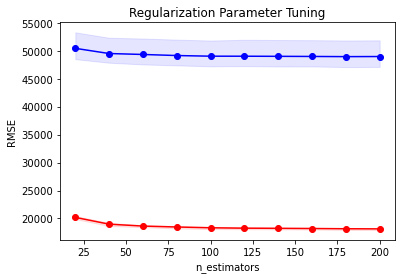

In [54]:
model_rf=RandomForestRegressor(n_estimators=200,  max_depth=best_depth, max_features=best_features, random_state=17)
Cs=list(range(20,201,20))
train_scores, valid_scores = validation_curve(model_rf, X_trees, y, "n_estimators", 
                                              Cs, cv=kf, scoring='neg_mean_squared_error')

plt.plot(Cs, np.sqrt(-train_scores.mean(axis=1)), 'ro-')

plt.fill_between(x=Cs, y1=np.sqrt(-train_scores.max(axis=1)), 
                 y2=np.sqrt(-train_scores.min(axis=1)), alpha=0.1, color = "red")


plt.plot(Cs, np.sqrt(-valid_scores.mean(axis=1)), 'bo-')

plt.fill_between(x=Cs, y1=np.sqrt(-valid_scores.max(axis=1)), 
                 y2=np.sqrt(-valid_scores.min(axis=1)), alpha=0.1, color = "blue")

plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('Regularization Parameter Tuning')

plt.show()

This time we can see that the results of train is much better than CV, but it is totally ok for the Random Forest. 

Higher value of n_estimators (>100) does not help much. Let's stick to the n_estimators=200 - it is high enough but not very computationally intensive.

### Gradient boosting

And finally we will try to use LightGBM to solve our problem.
We will try the model out of the box, and then tune some of its parameters using random search

In [55]:
#install if haven't already 
#!pip install lightgbm

In [56]:
%time
from lightgbm.sklearn import LGBMRegressor

model_gb=LGBMRegressor()
cv_scores = cross_val_score(model_gb, X_trees, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=1)

print(np.sqrt(-cv_scores.mean()))

Wall time: 0 ns
47658.55983079814


In [57]:
gs

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=17, shuffle=True),
                   estimator=LGBMRegressor(), n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551...
       3.59381366e-01, 3.94420606e-01, 4.32876128e-01, 4.75081016e-01,
       5.21400829e-01, 5.72236766e-01, 6.28029144e-01, 6.89261210e-01,
       7.56463328e-01, 8.30217568e-01, 9.11162756e-01, 1.00000000e+00]),
                                        'max_depth': [10],
                                        'n_estimators': [500],
                                        'num_leaves': [72],
                                        'random_state': [17],
                                        'reg_lambda': [0.0010722672220103231]},
                   random_sta

In [58]:
# model complexity optimization
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_grid={'max_depth':  randint(6,11),
            'num_leaves': randint(7,127),
            'reg_lambda': np.logspace(-3,0,100),
            'random_state': [17]}

gs=RandomizedSearchCV(model_gb, param_grid, n_iter = 50, scoring='neg_mean_squared_error', 
                n_jobs=-1, cv=kf, verbose=1, random_state=17)

gs.fit(X_trees,y)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=17, shuffle=True),
                   estimator=LGBMRegressor(), n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022548B5F9A0>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022571A7B850>,
                                        'random_state': [17],
                                        'reg_lambda': array([0.00...
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ])},
                   random_state=17, scoring='neg_mean_squared_er

In [59]:
np.sqrt(-gs.best_score_)

46730.98143380314

In [60]:
gs.best_params_

{'max_depth': 10,
 'num_leaves': 72,
 'random_state': 17,
 'reg_lambda': 0.0010722672220103231}

Let's fix n_estimators=500, it is big enough but is not to computationally intensive yet, and find the best value of the learning_rate

In [61]:
# model convergency optimization

param_grid={'n_estimators': [500],
            'learning_rate': np.logspace(-4, 0, 100),
            'max_depth':  [10],
            'num_leaves': [72],
            'reg_lambda': [0.0010722672220103231],
            'random_state': [17]}

gs=RandomizedSearchCV(model_gb, param_grid, n_iter = 20, scoring='neg_mean_squared_error', 
                n_jobs=-1, cv=kf, verbose=1, random_state=17)

gs.fit(X_trees,y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=17, shuffle=True),
                   estimator=LGBMRegressor(), n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551...
       3.59381366e-01, 3.94420606e-01, 4.32876128e-01, 4.75081016e-01,
       5.21400829e-01, 5.72236766e-01, 6.28029144e-01, 6.89261210e-01,
       7.56463328e-01, 8.30217568e-01, 9.11162756e-01, 1.00000000e+00]),
                                        'max_depth': [10],
                                        'n_estimators': [500],
                                        'num_leaves': [72],
                                        'random_state': [17],
                                        'reg_lambda': [0.0010722672220103231]},
                   random_sta

In [62]:
np.sqrt(-gs.best_score_)

45742.1640922473

In [63]:
gs.best_params_

{'reg_lambda': 0.0010722672220103231,
 'random_state': 17,
 'num_leaves': 72,
 'n_estimators': 500,
 'max_depth': 10,
 'learning_rate': 0.07390722033525783}

We have got the best params for the gradient boosting and will use them for the final prediction.

## 8. Prediction for test or hold-out samples


Lets sum up the results of our project. We will compute RMSE on cross validation and holdout set and compare them.

In [64]:
results_df=pd.DataFrame(columns=['model','CV_results', 'holdout_results'])

In [65]:
# hold-out features and target 
X_ho=x_test
y_ho=y_test

X_trees_ho=x_test

In [66]:
%time

#linear model
model=Ridge(alpha=1.0)

cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
score_cv=np.sqrt(-np.mean(cv_scores.mean()))


prediction_ho = model.fit(X, y).predict(X_ho)
score_ho=np.sqrt(mean_squared_error(y_ho,prediction_ho))

results_df.loc[results_df.shape[0]]=['Linear Regression',  score_cv,  score_ho]

Wall time: 0 ns


In [67]:
%time

#Random Forest
model_rf=RandomForestRegressor(n_estimators=200,  max_depth=23, max_features=5, random_state=17)

cv_scores = cross_val_score(model_rf, X_trees, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
score_cv=np.sqrt(-np.mean(cv_scores.mean()))


prediction_ho = model_rf.fit(X_trees, y).predict(X_trees_ho)
score_ho=np.sqrt(mean_squared_error(y_ho,prediction_ho))

results_df.loc[results_df.shape[0]]=['Random Forest',  score_cv,  score_ho]

Wall time: 0 ns


In [68]:
%%time

#Gradient boosting
model_gb=LGBMRegressor(reg_lambda=0.0010722672220103231, max_depth=10,
                       n_estimators=500, num_leaves=72, random_state=17, learning_rate=0.06734150657750829)
cv_scores = cross_val_score(model_gb, X_trees, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
score_cv=np.sqrt(-np.mean(cv_scores.mean()))

prediction_ho = model_gb.fit(X_trees, y).predict(X_trees_ho)
score_ho=np.sqrt(mean_squared_error(y_ho,prediction_ho))

results_df.loc[results_df.shape[0]]=['Gradient boosting',  score_cv,  score_ho]

Wall time: 11.7 s


In [69]:
results_df

,model,CV_results,holdout_results
0,Linear Regression,69882.597326,69299.338001
1,Random Forest,48901.257694,48074.865181
2,Gradient boosting,45884.958581,44878.041656


It seems we have done quite a good job. Cross validation results are inline with holdout ones. Our best CV model - gradient boosting, turned out to be the best on hold-out dataset as well (and still is very fast)

To sum up, we have got the solution that can predict the mean house value in the block with RMSE \$45k using our best model - LGB. It is not an extremely precise prediction: \$45k is about 20% of the average mean house price, but it seems that it is near the possible solution for these classes of model based on this data (it is popular dataset but I have not find any solution with significantly better results). 

We have done a lot but the results surely can be improved, at least one could try:

- feature engineering: better distances to cities (travel time), average values of target for the geographically closest neighbours (requires custom estimator function for correct cross validation)
- PCA for dimensionality reduction (I have mentioned it but didn't used)
- other models (at least KNN and SVM can be tried based on data)
- more time and effort can be spent on RF and LGB parameters tuning